***
# Linear Regression

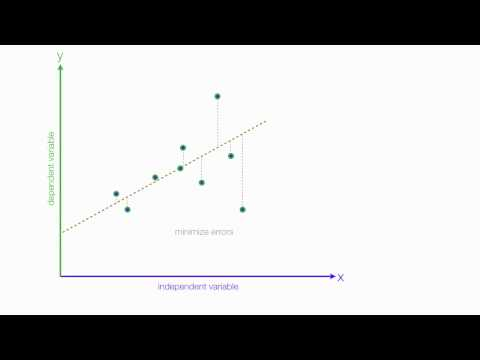

In [0]:
from IPython.display import YouTubeVideo

YouTubeVideo('zPG4NjIkCjc')

A regression uses the historical relationship between an independent variable (x) and a dependent variable (y) to predict the future values of the dependent variable. Businesses use regression to predict such things as future sales, stock prices, currency exchange rates, and productivity gains resulting from a training program.

<img src = 'http://ci.columbia.edu/ci/premba_test/c0331/images/s7/7176267017.gif' />

The line that best fits the available data is the one with the smallest possible set of distances between itself and each data point. To find the line with the best fit, calculate the actual distance between each data point and every possible line through the data points.

The line with the smallest set of distances between the data points is the regression line. The trajectory of this line will best predict the future relationship between the two variables.

The first step in a regression is to plot the data using a scatter plot. Use the table of monthly sales and advertising expenditures for the last year by a digital electronics company.

Sales is dependent (y) on advertising expenditures (x)
<img src = 'http://ci.columbia.edu/ci/premba_test/c0331/images/s7/1814766481.gif'/>

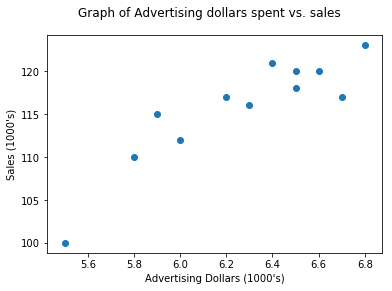

In [0]:
exampleX = [5.5,5.8,6,5.9,6.2,6.3,6.5,6.6,6.4,6.5,6.7,6.8]
exampleY = [100,110,112,115,117,116,118,120,121,120,117,123]
from matplotlib import pyplot as plt

plt.scatter(exampleX,exampleY)
plt.xlabel("Advertising Dollars (1000's)")
plt.ylabel("Sales (1000's)")
plt.suptitle('Graph of Advertising dollars spent vs. sales')
plt.show()

Scatter plots are effective in visually identifying relationships between variables. These relationships can be expressed mathematically in terms of a correlation coefficient. 

When you use regression to predict future values of the dependent variable, the ideal correlation between the independent and dependent variable is high, somewhere in the range between .5 to .99. Viewing the scatter plot above, you can see that there appears to be some degree of correlation between the level of advertising expenditure and sales. 

A regression line is the line with the smallest possible set of distances between itself and each data point. It may touch some data points while not touching others. The distances of the data points from the regression line are called *error terms*.

The figure below is the same as the scatter plot above, with the addition of a regression line fitted to the historical data.

<img src = 'http://ci.columbia.edu/ci/premba_test/c0331/images/s7/5703903823.gif'/>

The error term exists because a regression model can never include all possible variables; some predictive capacity will always be absent, particularly in simple regression.
***
### Pop Quiz!
<img src = 'http://ci.columbia.edu/ci/premba_test/c0331/images/s7/8450332140.gif' />

The two graphs illustrate simple linear regressions. Which has a higher predictive quality and why?
***
***
The typical procedure for finding the line of best fit is called the least-squares method. In this calculation, the best fit is found by taking the difference between each data point and the line, squaring each difference, and adding the values together. The least-squares method is based upon the principle that the sum of the squared errors should be made as small as possible so the regression line has the least error.

Once this line is determined, it can be extended beyond the historical data to predict future levels of product awareness, given a particular level of advertising expenditure.

The least-squares method starts with:
1. getting the mean of the x values and y values
2. getting the slope by using 

$$m=\sum_{i=1}^n \frac{(x_i-\bar{X})(y_i-\bar{Y})}{(x_i-\bar{X})^2}$$

3. computing the y-intercept using the formula:

$$b=\bar{Y}-m\bar{X}$$

4. use the slope m and y-intercept b to form the equation of the line.

Let's use the monthly sales and advertising expenditures data set to show how linear regressions are carried out in python.

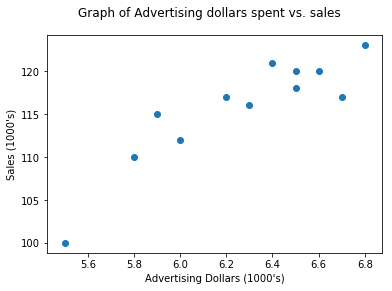

In [0]:
exampleX = [5.5,5.8,6,5.9,6.2,6.3,6.5,6.6,6.4,6.5,6.7,6.8]
exampleY = [100,110,112,115,117,116,118,120,121,120,117,123]

plt.scatter(exampleX,exampleY)
plt.xlabel("Advertising Dollars (1000's)")
plt.ylabel("Sales (1000's)")
plt.suptitle('Graph of Advertising dollars spent vs. sales')
plt.show()

## Questions on Linear Regressions

### Question 1

Download the dataset from this link: https://www.kaggle.com/mohansacharya/graduate-admissions/downloads/graduate-admissions.zip/2


<img src = 'https://img.freepik.com/free-photo/graduation-take-black-yellow-tassel-front-bokeh-blurry-background_43157-129.jpg?size=626&ext=jpg' />

To get into graduate school, one needs to have a great academic history to get accepted. However, is there one measure of academic achievements which most greatly affect your chances of getting accepted to graduate school? We can use this dataset of 400 or 500 applicants as well as their academic history measured by 7 variables to carry out a regression to predict the chances of an applicant being accepted to graduate school, and use correlation to find the variables that are correlated to chances of getting accepted.

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )


Read the data into the notebook using the pandas package.

In [0]:
import pandas as pd

grad_data = pd.read_csv('Admission_Predict.csv')
grad_data.columns = ['no','GRE','TOEFL','Uni_rating','SOP','LOR','CGPA','research','admission_chance']
#grad_data

(a) Plot a scatter diagram of MYCT, x on PRP, y.

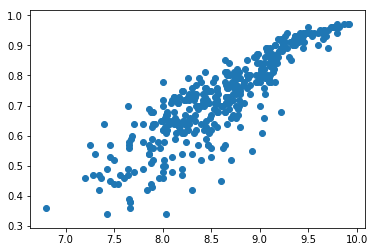

In [0]:
gy = grad_data['admission_chance'] #dependent variable
gx = grad_data['CGPA'] #independent variable

%matplotlib inline
from matplotlib import pyplot as plt

plt.scatter(gx,gy)

plt.show()

(b) Calculate the equation of the least squares regression line of y on x.

In [0]:
import numpy as np

gradYfit=np.poly1d(np.polyfit(gx,gy,1))
print(gradYfit)

 
0.2088 x - 1.072


(c) Plot the regression line onto the scatter plot.

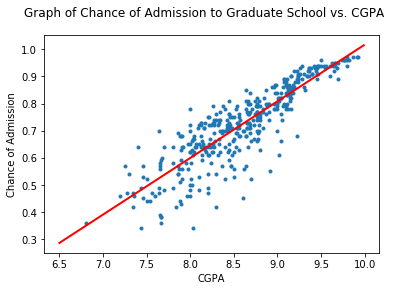

In [0]:
gradLineX = np.arange(6.5,10,0.01)
gradLineY = [gradYfit(i) for i in gradLineX]
plt.scatter(gx,gy,marker='.')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')
plt.suptitle('Graph of Chance of Admission to Graduate School vs. CGPA ')
plt.plot(gradLineX,gradLineY,color='r',linewidth=2)

(d) What is the correlation coefficient between CGPA and chance of admission to graduate school? Can we use the regression equation to predict chances of admission based on CGPA? Why?

In [0]:
np.corrcoef(gx,gy)[0][1]

0.87328909935530008

(e) A hopeful graduate school applicant has a CGPA of  8.3. Predict their chances of admission. 

In [0]:
#y = 0.2088 x - 1.072
prediction = (0.2088*8.3)-1.072
prediction

0.6610400000000003

## Question 2

Download the dataset from this link: https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls

<img src = 'https://bit.ly/2YoOpgd' />

All modern structures are made up of, for the most part, concrete. However, we need to use the compressive strength of concrete as a measure of the concrete's ability to resist loads which tend to compress it so that building safety is ensured. There are many factors that contribute towards a concrete's compressive strength, such as the volumes of individual components used in the concrete mixture. 

The dataset contains information about 1030 instances describing the variables:

1. Cement - kg in a m3 mixture 
2. Blast Furnace Slag - kg in a m3 mixture 
3. Fly Ash - kg in a m3 mixture 
4. Water - kg in a m3 mixture 
5. Superplasticizer - kg in a m3 mixture 
6. Coarse Aggregate - kg in a m3 mixture 
7. Fine Aggregate - kg in a m3 mixture 
8. Age - Day (1~365) 
9. Concrete compressive strength - MPa 

Read the data into the notebook using pandas.

In [0]:
concrete_data = pd.read_excel('Concrete_Data.xls')
concrete_data.columns = ['cement','slag','fly_ash','water','superplas','coarseAgg','fineAgg','age','compressive_strength']
#concrete_data

**(a) Draw scatter plots of each variable 1-8 against the concrete compressive strength.**

**(b) For each plot, calculate the least squares line of regression. Plot the line on each diagram.**

**(c)Interpret the regression lines based on their gradients and y-intercepts.**

 
0.07958 x + 13.44


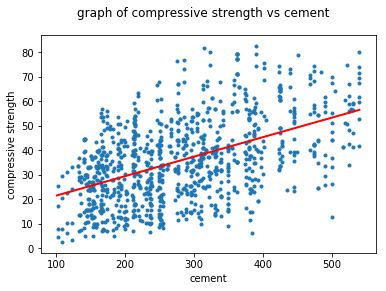

In [0]:
cy = concrete_data['compressive_strength']
x1 = concrete_data['cement']
x2 = concrete_data['slag']
x3 = concrete_data['fly_ash']
x4 = concrete_data['water']
x5 = concrete_data['superplas']
x6 = concrete_data['coarseAgg']
x7 = concrete_data['fineAgg']

def regression(cx,cy,xlab,ylab,title):
    cementYfit=np.poly1d(np.polyfit(cx,cy,1))
    print(cementYfit)
    cxx = np.arange((np.min(cx)-1),(np.max(cx)+1),0.5)
    cyy = [cementYfit(i) for i in cxx]
    plt.plot(cxx,cyy,color='r',linewidth=2)
    plt.scatter(cx,cy,marker='.')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.suptitle(title)
    plt.show()
    
regression(x1,cy,'cement','compressive strength','graph of compressive strength vs cement')

The gradient represents the average change in cement volume that's associated with a one-unit increase in the compressive strength.

On average, every 0.07958 kg in m3 of a mixture made the concrete 1 MPa stronger.

The y-intercept describes the average y-value when x = 0.

The concrete mixture must have more than 13.44 kg per m3 of cement for the concrete to have any compressive strength.

 
0.02611 x + 33.89


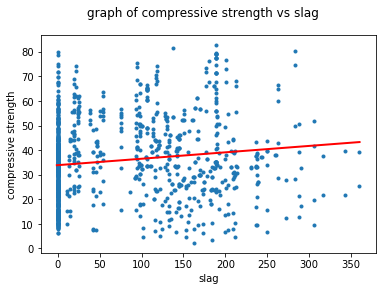

In [0]:
regression(x2,cy,'slag','compressive strength','graph of compressive strength vs slag')


On average, every 0.6963 kg of slag in m3 of a mixture made the concrete 1 MPa stronger.

The concrete mixture must have more than 48.95 kg of slag per m3 for the concrete to have any compressive strength.

 
-0.02761 x + 37.31


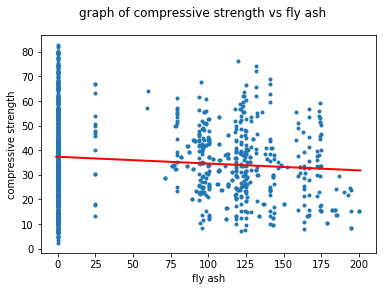

In [0]:
regression(x3,cy,'fly ash','compressive strength','graph of compressive strength vs fly ash')


On average, every 0.4051 kg in m3 of a mixture made the concrete 1 MPa weaker.<br>
-less fly ash is better<br>
The concrete mixture must have less than 68.7 kg of cement per m3 for the concrete to have any compressive strength.

 
-0.2266 x + 76.95


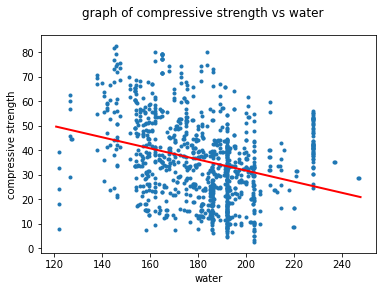

In [0]:
regression(x4,cy,'water','compressive strength','graph of compressive strength vs water')

On average, every 0.3702 kg of water in m3 of a mixture made the concrete 1 MPa weaker.<br>
-less water is better<br>
The concrete mixture must have less than 194.8 kg of water per m3 for the concrete to have any compressive strength.

 
1.024 x + 29.47


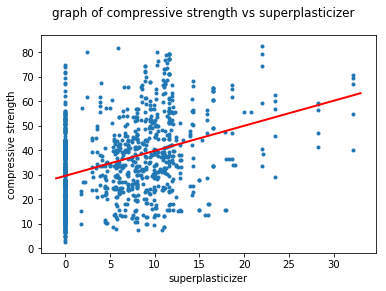

In [0]:
regression(x5,cy,'superplasticizer','compressive strength','graph of compressive strength vs superplasticizer')

On average, every 0.1309 kg of superplasticizer in m3 of a mixture made the concrete 1 MPa stronger.

The concrete mixture must have more than 48.95 kg of superplasticizer per m3 for the concrete to have any compressive strength.

 
-0.03544 x + 70.29


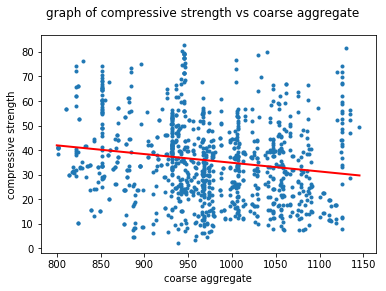

In [0]:
regression(x6,cy,'coarse aggregate','compressive strength','graph of compressive strength vs coarse aggregate')

On average, every 0.7676 kg of coarse aggregate in m3 of a mixture made the concrete 1 MPa weaker.<br>
-less coarse aggregate is better<br>
The concrete mixture must have less than 1000 kg of coarse aggregate per m3 for the concrete to have any compressive strength.

 
-0.03485 x + 62.78


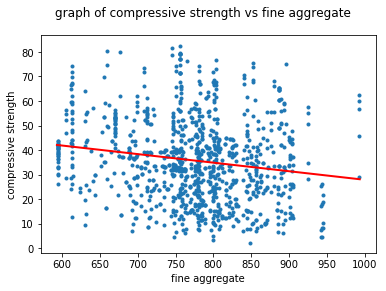

In [0]:
regression(x7,cy,'fine aggregate','compressive strength','graph of compressive strength vs fine aggregate')

On average, every 0.8027 kg of fine aggregate in m3 of a mixture made the concrete 1 MPa weaker.<br>
-less fine aggregate is better<br>
The concrete mixture must have less than 802.3 kg of fine aggregate per m3 for the concrete to have any compressive strength.

**(d) Which variables are (i) positively correlated, (ii) negatively correlated, or (iii) not correlated to the concrete compressive strength?**

Positively correlated: cement, slag, superplasticizer, age<br>
Negatively correlated: fly ash, water, coarse and fine aggregate

In [0]:
print('x1 and cy',np.corrcoef(x1,cy)[0][1])
print('x2 and cy',np.corrcoef(x2,cy)[0][1])
print('x3 and cy',np.corrcoef(x3,cy)[0][1])
print('x4 and cy',np.corrcoef(x4,cy)[0][1])
print('x5 and cy',np.corrcoef(x5,cy)[0][1])
print('x6 and cy',np.corrcoef(x6,cy)[0][1])
print('x7 and cy',np.corrcoef(x7,cy)[0][1])


x1 and cy 0.497832722275
x2 and cy 0.134824445143
x3 and cy -0.105753347636
x4 and cy -0.28961347569
x5 and cy 0.366102297683
x6 and cy -0.164927821057
x7 and cy -0.167248961982


**(e) Based on the correlation coefficient of each variable, recommend the best way to optimize the compressive strength of the concrete.**

To optimize the compressive strength of concrete, the concrete mixture must have higher volumes of cement, superplasticizer, fly ash and is older, and must have lesser volumes of fly ash, water, and coarse and fine aggregate.